In [12]:
import forallpeople
forallpeople.environment('structural', top_level=True)
from math import sqrt
import streamlit as st
from handcalcs.decorator import handcalc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
from math import pi,sqrt
import PyNite
from PyNite import FEModel3D

In [13]:
# before importing you can install PyNite using " pip install PyNite"
# import PyNite
# from PyNite import FEModel3D

In [14]:
# Input parameters

In [15]:
span = 3.0   # m
uniform_D = 3.2    # kN/m
uniform_L = 4.8    # kN/m
uniform_start = 0    # starting point for the uniform load , 0m
uniform_end = span   # End point for the uniform load, equal to span length

In [16]:
# Define beam object 

simple_beam = FEModel3D()

In [17]:
# Add node to the beam

simple_beam.add_node("N1",0,0,0)
simple_beam.add_node("N2",span,0,0)

'N2'

In [18]:
# Define a material (I will use steel beam property)
E = 20000       # Modulus of elasticity (mPa
G = 77*10**3    # Shear modulus of elasticity (Mpa)
nu = 0.3        # Poisson's ratio
rho = 0.0078    # Density (kg/mm3)

simple_beam.add_material('Steel', E, G, nu, rho)

In [19]:
# Assign the beam material property to a member with section property
# Let's use W12x14 (W310x21) steel section.
# We can get these properties automatically but for now, lets use defined values

# Add W12x14 (W310x21) steel beam with the following properties:

Iy = 37*10**6         # mm^4
Iz = 0.983*10**6      # mm^4
J = 29.4*10**3        # mm^4
A = 2690              # mm^2
simple_beam.add_member('M1', 'N1', 'N2', 'Steel', Iy, Iz, J, A)

'M1'

In [20]:
# Provide support condition to the beam
simple_beam.def_support('N1', True, True, True, False, False, False)
simple_beam.def_support('N2', True, True, True, True, False, False)

In [21]:
# Add load combination that you want to use, we will use one as an example combo = 1.25*DL+1.5*LL
# You can use shift+tab to see the input parameters for any function

simple_beam.add_load_combo('LC1',{'D':1.25,'L':1.5},'strength')

In [22]:
# Add uniform loading to the beam 

simple_beam.add_member_dist_load('M1', 'Fy', -uniform_D, -uniform_D, uniform_start, uniform_end,'D')
simple_beam.add_member_dist_load('M1', 'Fy', -uniform_L, -uniform_L, uniform_start, uniform_end,'L')

In [23]:
# Now analyze the beam

# Analyze the beam
simple_beam.analyze(check_statics=True)

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+--------+--------+--------+--------+--------+---------+--------+---------+--------+---------+
| Load Combination | Sum FX | Sum RX | Sum FY | Sum RY | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY | Sum MZ | Sum RMZ |
+------------------+--------+--------+--------+--------+--------+--------+--------+---------+--------+---------+--------+---------+
|       LC1        |   0    |   0    | -33.6  |  33.6  |   0    |   0    |   0    |    0    |   0    |    0    | -50.4  |   50.4  |
+------------------+--------+--------+--------+--------+--------+--------+--------+---------+--------+---------+--------+---------+



In [24]:
# Lets plot shear force and bending moment diagram

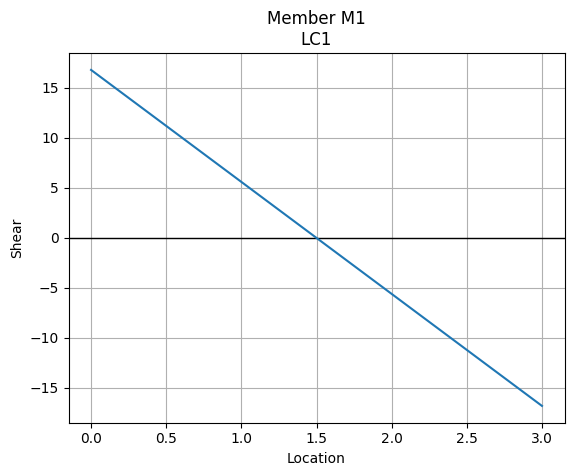

In [25]:
simple_beam.Members["M1"].plot_shear(Direction = "Fy",combo_name = "LC1", n_points = 100)

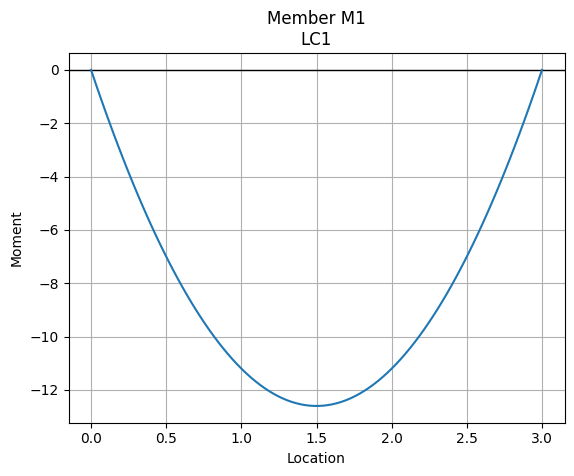

In [26]:
simple_beam.Members["M1"].plot_moment(Direction = "Mz",combo_name = "LC1", n_points = 100)

In [27]:
# Now, we can extract moment or shear value at any location of this beam
# Lets get the maximum factored moment for LC1
# I am using min because the moment is negative on the plot

M_f = simple_beam.Members['M1'].min_moment('Mz',"LC1")

In [29]:
print(f'Maximum factored moment on the beam, M_f = {abs(round(M_f,2))} kN-m')

Maximum factored moment on the beam, M_f = 12.6 kN-m
